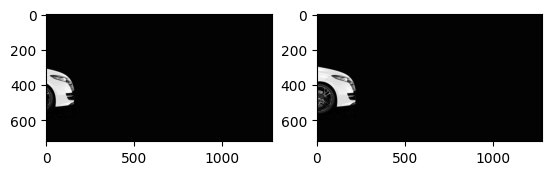

[-100, -120]


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the video and save the frames in a list
vid= cv2.VideoCapture('car.mp4')

images=[] # Create a list to store all the extracted frames

# Read each frame in the video
while(vid.isOpened()):
  ret, frame = vid.read()
  if ret == False:
    break

  # saving each frame in images list
  images.append(frame)

vid.release()

#Convert the list to numpy array
images=np.array(images)

images=images[:,:,:,0] #Extracting only the zeroth planes of the frames

def min_diff(ref_frame, curr_blk):
  rows,cols= ref_frame.shape #Obtain the number of rows and column in the ref plane
  row_col=[] # array to store upper left corner pixel (row,col) of target block
  mse=[] # array to store difference between each target block and the ref block
  for r in range(0,rows//8):
    for c in range(0,cols//8):
      #select 8x8 subblock of the reference frame
      sub_blk= ref_frame[r*8: (r+1)*8, c*8:(c+1)*8]
      # Find mse between the current block and the subblock in the ref image
      error= np.square(sub_blk-curr_blk).mean(axis=None)
      mse.append(error)
      row_col.append((r*8,c*8))
  mse=np.array(mse)
  row_col= np.array(row_col)
  min_mse=mse.min()
  matched=np.where(mse ==min_mse ) #obtain the index of minimum mse
  return min_mse, row_col[matched]

ref_frame= images[3] #First frame of the video which will be taken as a reference frame
curr_frame= images[4] #Second frame of the video for which motion vector has to be found out w

plt.subplot(1,2,1)
plt.imshow(images[3], cmap="gray")
plt.subplot(1,2,2)
plt.imshow(images[4], cmap="gray")
plt.show()

p = 100
q = 120
#Extract the current block from the current frame for which the motion vector has to be obtain
curr_blk= curr_frame[p: (p+8), q:(q+8)]
mse, coordinates = min_diff(ref_frame, curr_blk)

# top left corner cordinates of matching block with minimum in the reference frame
x=coordinates[0,0] # x coordinate of matching block in the reference plane
y=coordinates[0,1] #y coordinate of matching block in the reference plane

#Obtain motion vector
# reference coordinates - current coordinates
mv = [x-p,y-q]
print(mv)